# PyTorch/TensorFlow ile Sınıflandırma

[Yeni Başlayanlar için YZ Müfredatı](https://github.com/microsoft/ai-for-beginners)'ndan Laboratuvar Ödevi.

## Bölüm 1: Süsen Sınıflandırma

Süsen (Iris) veri kümesi, 3 farklı süsen sınıfının 150 kaydını içerir. Her kayıt 4 sayısal parametre içerir: Çanak yaprağı uzunluğu/genişliği ve taç yaprağı uzunluğu/genişliği. Güçlü bir sinir ağına ihtiyacınız olmayan basit bir veri kümesi örneğidir.

### Veri Kümesini Alma

Süsen veri kümesi, Scikit Learn'de yerleşiktir, böylece onu kolayca alabiliriz:

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
features = iris['data']
labels = iris['target']
class_names = iris['target_names']
feature_names = iris['feature_names']

print(f"Öznitelikler: {feature_names}, Sınıflar: {class_names}")

Öznitelikler: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], Sınıflar: ['setosa' 'versicolor' 'virginica']


### Veriyi Görselleştirme

Çoğu durumda, ayrılabilir görünüp görünmediklerini görmek için verileri görselleştirmek mantıklıdır; bu bize iyi bir sınıflandırma modeli oluşturabilmemiz gerektiğini garanti eder. Birkaç özniteliğimiz olduğundan, farklı sınıfları farklı nokta renkleriyle gösteren bir dizi ikili 2B dağılım grafiği oluşturabiliriz. Bu, **seaborn** adlı bir paket tarafından otomatik olarak yapılabilir:

In [2]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(features,columns=feature_names).join(pd.DataFrame(labels,columns=['Label']))

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


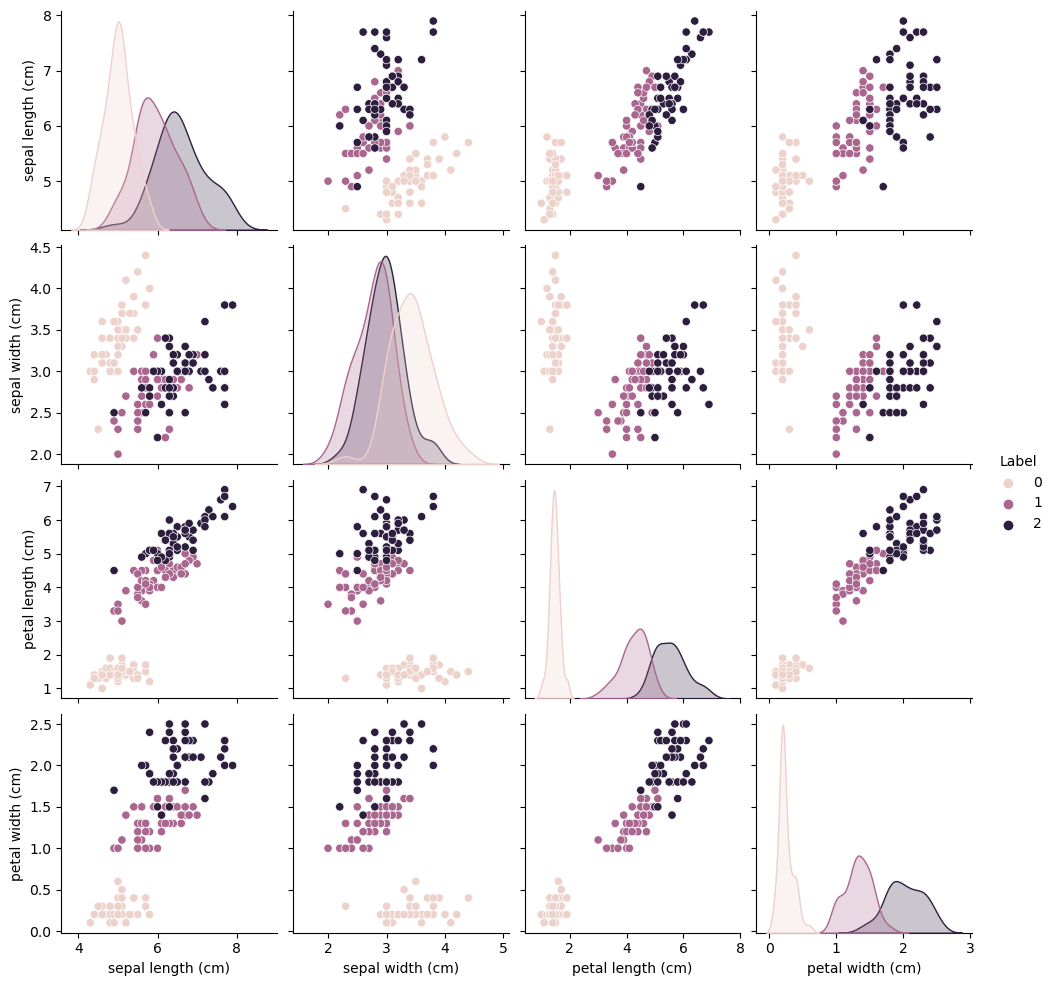

In [3]:
sns.pairplot(df,hue='Label')

### Veriyi Normalleştirme ve Kodlama

Veriyi sinir ağı eğitimine hazırlamak için girdileri [0..1] aralığında normalleştirmemiz gerekiyor. Bu, düz `numpy` işlemleri veya [Scikit Learn yöntemleri](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) kullanılarak yapılabilir.

Ayrıca, hedef etiketin birebir olarak kodlanmasını isteyip istemediğinize karar vermeniz gerekir. PyTorch ve TensorFlow, sınıf numarasını bir tamsayı (0'dan N-1'e kadar) veya birebir kodlanmış vektör olarak besleme yapmanızı sağlar. Sinir ağı yapısı oluştururken, buna göre kayıp fonksiyonunu belirtmeniz gerekir (örn. sayısal gösterim için *seyrek kategorik çapraz-entropi* ve birebir kodlama için *çapraz-entropi kaybı*). Birebir kodlama [Sklearn kullanılarak](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) veya bu kod parçası kullanılarak da yapılabilir:

```python
n_values = np.max(labels) + 1
labels_onehot = np.eye(n_values)[labels]
``` 

In [4]:
# Verileri normalleştirmek ve kodlamak için kod

### Veriyi Eğitim ve Test Olarak Bölme

Ayrı eğitim ve test veri kümemiz olmadığı için, bunu eğitim ve test veri kümesini [Sklearn kullanarak](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ayırmamız gerekiyor.

In [5]:
# Veriyi Bölme

### Sinir Ağını Tanımlama ve Eğitme

Artık yola çıkmaya hazırsınız, tercih ettiğiniz çerçeveyi içe aktarın, sinir ağını tanımlayın ve eğitimin davranışını ve geçerleme doğruluğunu gözlemleyerek eğitime başlayın.

In [6]:
# Ağı tanımla

In [7]:
# Ağı eğit

In [8]:
# Eğitim/geçerleme doğruluk grafiğini görselleştirin

### Deney

Artık sonucu nasıl etkilediğini görmek için farklı ağ mimarilerini deneyebilirsiniz. Deneyin:
1. 3 nöronlu tek katmanlı ağ (sınıf sayısına eşit)
1. Küçük/orta/büyük gizli katmana sahip iki katmanlı ağ
1. Daha fazla katman kullanma

Çok sayıda nöron (parametre) içeren zengin modeli kullanırken, aşırı öğrenmeyi gözlemlediğinizden emin olun.

In [9]:
# Deney

## Bölüm 2: MNIST Eğitimi

Hem Keras hem de PyTorch yerleşik veri kümesi olarak MNIST'i içerir, bu nedenle onu birkaç satır kodla kolayca elde edebilirsiniz ([Keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/datasets.html)). Ayrıca hem eğitim hem de test veri kümelerini manuel olarak bölmeden yükleyebileceksiniz.

In [10]:
# Veri kümesini yükleme

Şimdi, veri kümesinin normalleştirildiğinden emin olmak (muhtemelen zaten olacaktır), bir sinir ağı tanımlayıp eğitmek için yukarıdaki adımları uygulamanız gerekir.

## Ana Fikirler

1. Sinir ağları, geleneksel makine öğrenmesi görevleri için kullanılabilir. Ancak, çoğu durumda çok güçlüdürler ve aşırı öğrenmeye neden olabilirler.
1. Bu ödevde aşırı öğrenme davranışını gözlemlemeniz ve bundan kaçınmaya çalışmanız önemlidir.
1. Keras gibi çerçevelerle, bazen bir sinir ağını eğitmek oldukça basittir. Ama neler olduğunu anlamalısınız.